РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

In [1]:
import numpy as np
from scipy.stats import randint

In [3]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [4]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [5]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49]) #0:49

0.2


РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ

распределение Бернулли описывает события, имеющие ровно два исхода

Вы стреляете по мишени в тире. Вероятность попасть составляет . В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.

Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов

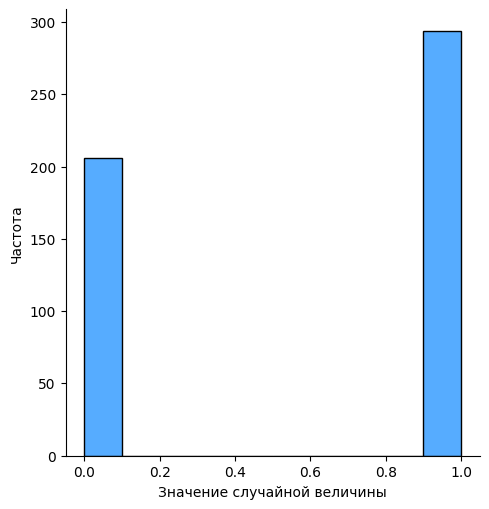

In [6]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [8]:
#количество неудач и попаданий в нашей модели
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 206]
 [  1 294]]


БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Биномиальным называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

*Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.*

*Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные? вычислять вероятность того, что за день производится от восьми до десяти небракованных изделий*

In [9]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

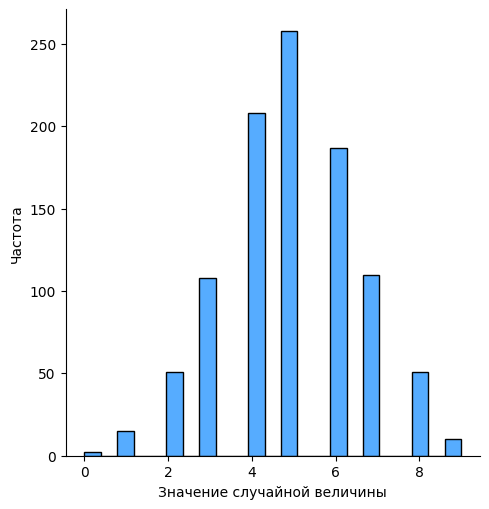

In [16]:
#биноминальное распределение с параметром p = 0.5 и количеством испытаний,
# равным 10, и реализовать 1000 попыток
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

РАСПРЕДЕЛЕНИЕ ПУАССОНА

дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

*Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.*

*Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?*

In [19]:
import scipy

#для 5 операторов
scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

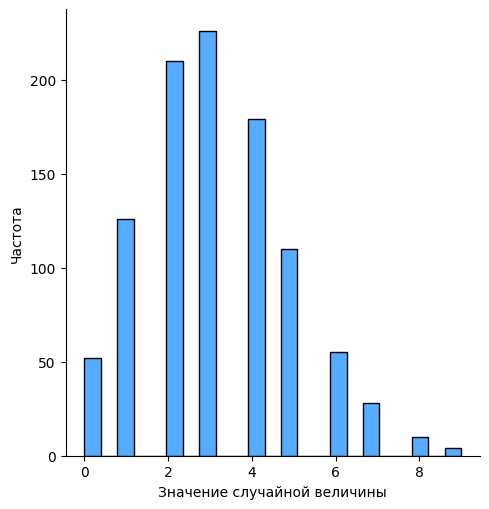

In [20]:
#Например, будем рассматривать 1000 реализаций случайной величины, у которой лямбда=3
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [27]:
#8.7
scipy.stats.distributions.poisson.pmf(16, 16)

0.09921753162215541

РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

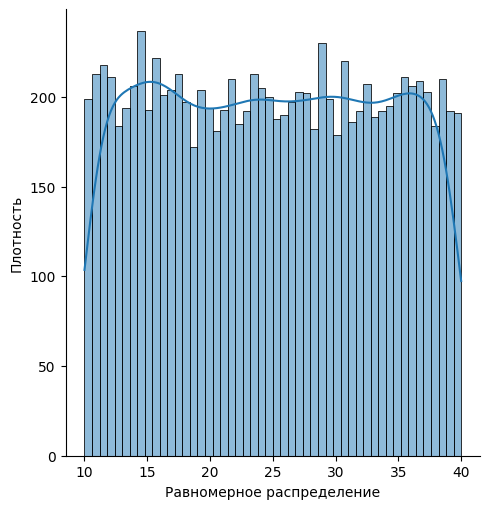

In [28]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

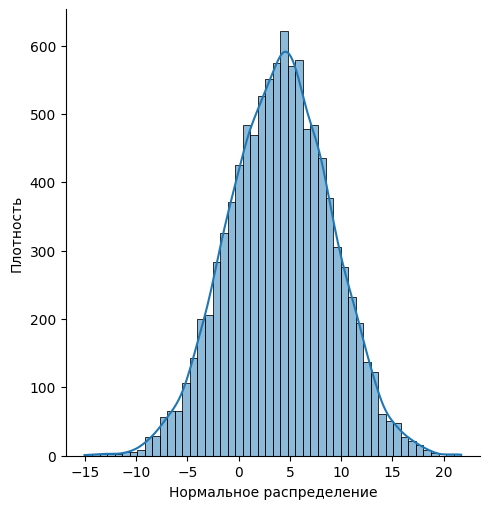

In [29]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

In [30]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

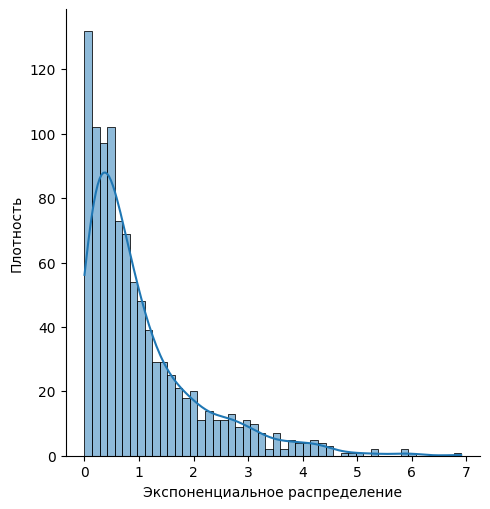

In [31]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')